In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_raw: pd.DataFrame = pd.read_csv(
    'data/processed_data.csv',
    parse_dates=["Time"],
    index_col=[0],
    sep=';'
)

threshold = 1500
df = df_raw[df_raw['Corrente motor'] > threshold]

# Drop all rows with NaN values
df = df.dropna().copy()

In [16]:
def remove_problematic_columns(df):
    # Lista para armazenar colunas a serem removidas
    columns_to_drop = []

    # Verifica cada coluna no DataFrame
    for col in df.columns:
        # Verifica se a coluna contém tipos de dados não numéricos
        if df[col].dtype == 'object':
            print(f"Coluna '{col}' removida: contém tipo de dados 'object'.")
            columns_to_drop.append(col)
            continue

        # Verifica se a coluna contém valores não numéricos
        if not np.isfinite(df[col]).all():
            print(f"Coluna '{col}' removida: contém valores não numéricos (NaN ou infinito).")
            columns_to_drop.append(col)

    # Remove as colunas problemáticas
    df_cleaned = df.drop(columns=columns_to_drop)

    return df_cleaned
df = remove_problematic_columns(df)

Coluna 'Unnamed: 58' removida: contém tipo de dados 'object'.


In [17]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df.values)

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_normalized)

df_reduced = pd.DataFrame(X_reduced)

In [18]:
df_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.489299,0.976574,1.029544,-1.843139,3.757707,-0.870917,-1.372993,-0.020211,0.638641,-0.066024,...,-0.342808,1.898249,0.369290,0.611587,-0.011925,0.849997,-0.534673,0.344645,-0.133153,0.583627
1,-0.489393,0.976358,1.029566,-1.843081,3.757689,-0.870784,-1.373144,-0.020209,0.638778,-0.066460,...,-0.342751,1.898212,0.369181,0.611340,-0.011948,0.850112,-0.534737,0.343698,-0.133489,0.583443
2,-0.376029,1.017124,1.006326,-1.789496,3.500564,-0.935976,-1.555673,-0.015368,0.844782,0.347085,...,-0.428768,1.658122,0.584250,0.496009,0.006595,0.814387,-0.580814,0.278170,-0.158210,0.721799
3,-1.041358,0.776486,0.114726,-1.933298,3.274606,-0.606386,-1.634588,-0.022933,1.047271,0.224839,...,-0.311400,1.496458,0.332580,0.225848,-0.062553,0.574105,-0.466116,0.415796,0.200339,0.608823
4,-1.040995,0.777432,0.117619,-1.933110,3.275519,-0.607991,-1.634476,-0.023041,1.045536,0.224750,...,-0.309823,1.496279,0.333276,0.224318,-0.061838,0.574607,-0.464560,0.415979,0.200206,0.608501


In [19]:
# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada por cada componente: {explained_variance}")

Variância explicada por cada componente: [0.31552018 0.09969142 0.08448281 0.06997175 0.05890425 0.0449113
 0.04048304 0.02916036 0.02430435 0.02182366 0.01809883 0.01605633
 0.01451745 0.01392529 0.01275921 0.01198658 0.01130631 0.01053731
 0.01002702 0.00932091 0.00766695 0.00681133 0.00655092 0.00598121
 0.00545165]


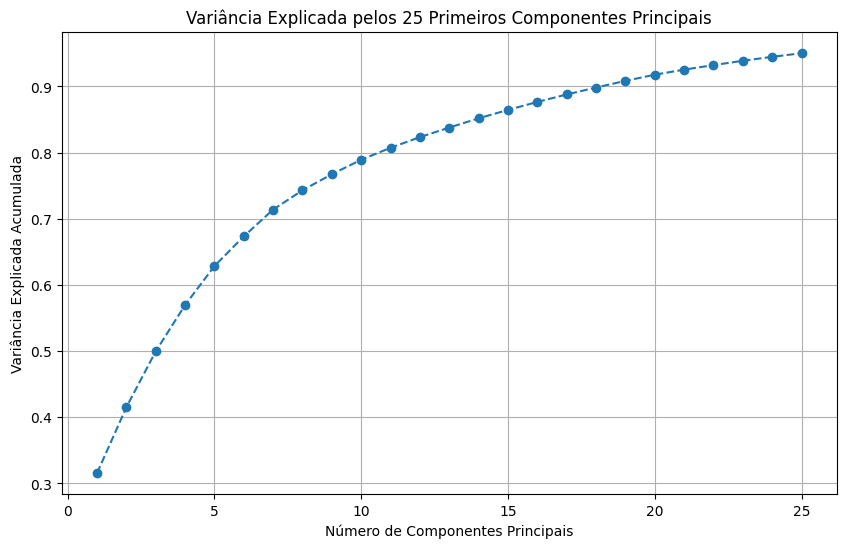

In [20]:
# Gráfico de variância explicada acumulada
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada pelos 25 Primeiros Componentes Principais')
plt.grid(True)
plt.show()

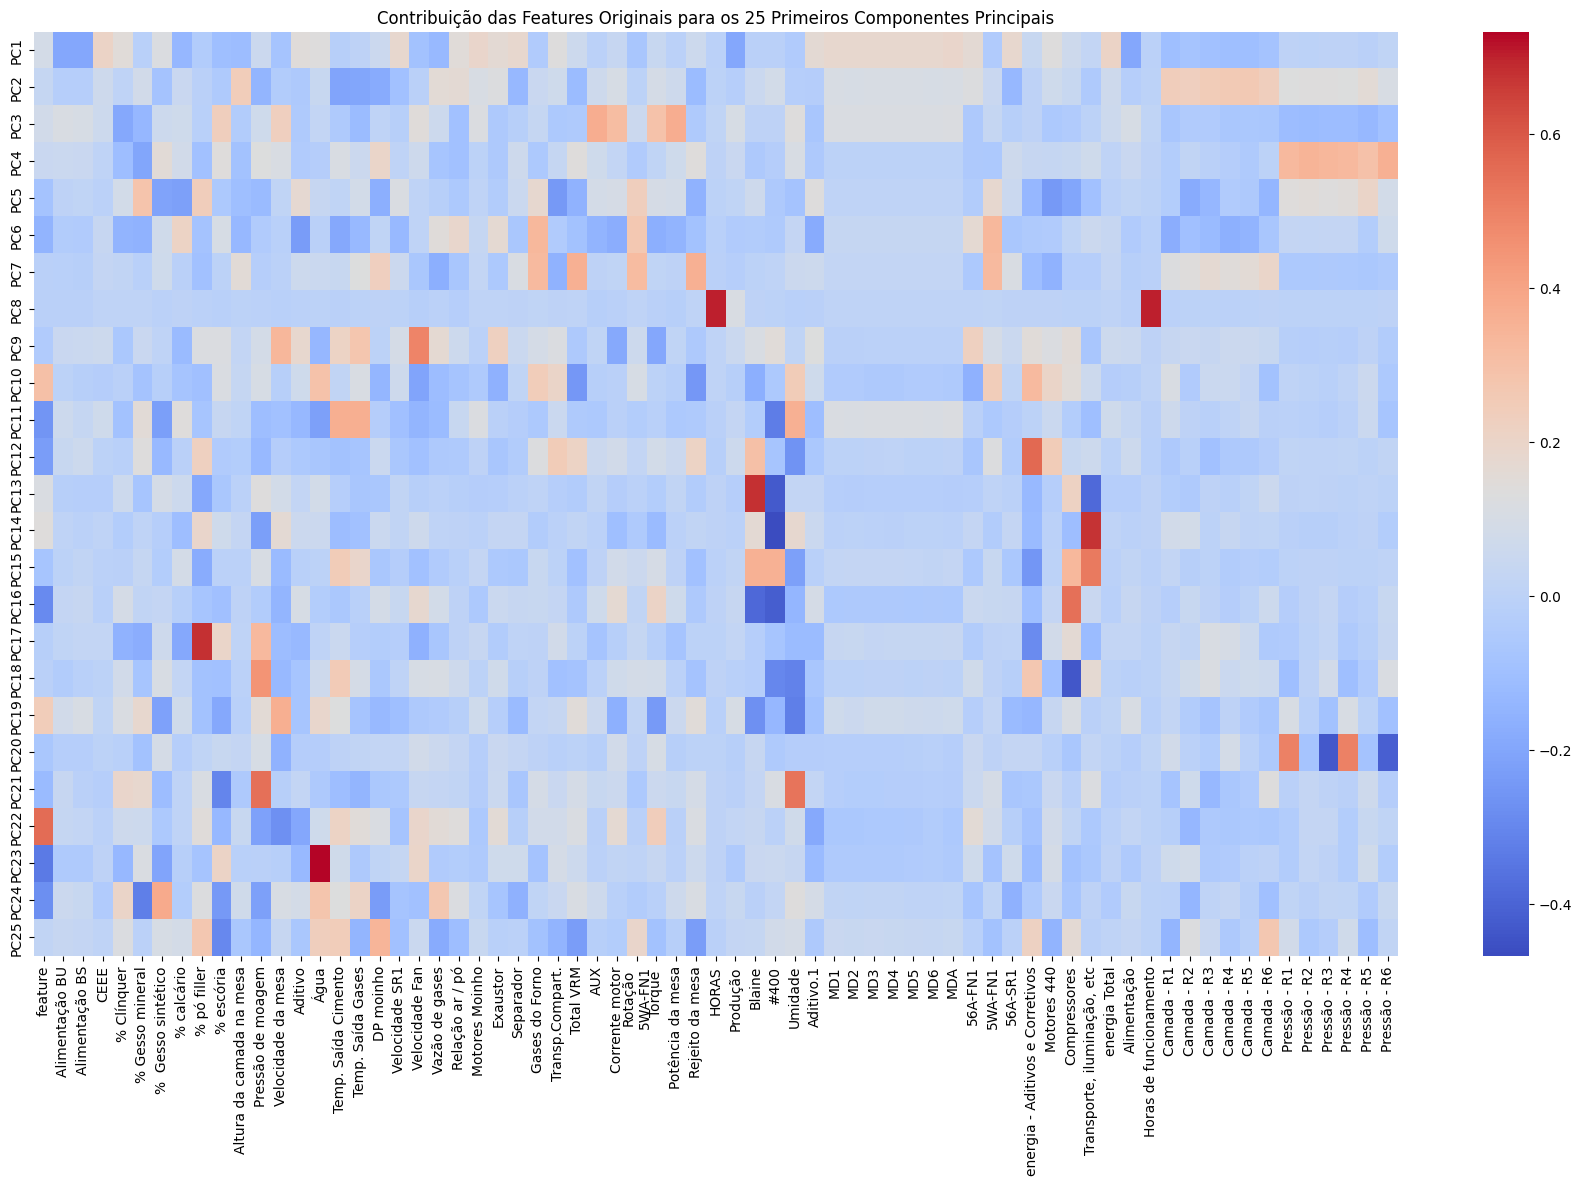

In [31]:
# Heatmap dos componentes principais
components_df = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(25)])
plt.figure(figsize=(22, 12))
sns.heatmap(components_df, cmap='coolwarm', annot=False)
plt.title('Contribuição das Features Originais para os 25 Primeiros Componentes Principais')
plt.show()

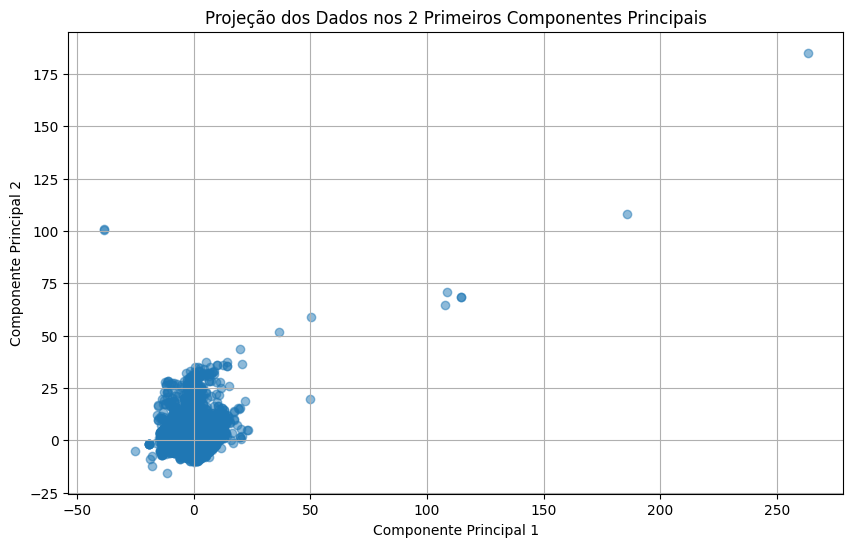

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Projeção dos Dados nos 2 Primeiros Componentes Principais')
plt.grid(True)
plt.show()